In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in the dataset from the url
data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
data.sample(10)

iso_code      continent             location        date  total_cases  \
1797        ATG  North America  Antigua and Barbuda  2020-08-22         94.0   
52826       TWN           Asia               Taiwan  2020-05-03        436.0   
11715       COL  South America             Colombia  2020-11-20    1233444.0   
9739        CAN  North America               Canada  2020-09-08     135757.0   
55688       UGA         Africa               Uganda  2020-04-23         74.0   
1241        AND         Europe              Andorra  2020-11-08       5383.0   
27984  OWID_KOS         Europe               Kosovo  2020-02-08          NaN   
15968       ECU  South America              Ecuador  2020-05-19      34151.0   
49527       ZAF         Africa         South Africa  2020-11-16     752269.0   
24730       NaN            NaN        International  2020-09-29        721.0   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
1797         0.0               0.143           3.0         0.0   
52826        4.0               1.000           6.0         0.0   
11715     7954.0            7249.571       34929.0       168.0   
9739      1462.0             619.286        9203.0         7.0   
55688       11.0               2.714           NaN         0.0   
1241        64.0              79.714          75.0         0.0   
27984        0.0               0.000           NaN         0.0   
15968      569.0             533.143        2839.0        40.0   
49527     1245.0            1963.429       20314.0        73.0   
24730        0.0               0.000          15.0         0.0   

       new_deaths_smoothed  ...  gdp_per_capita  extreme_poverty  \
1797                 0.000  ...       21490.943              NaN   
52826                0.000  ...             NaN              NaN   
11715              180.000  ...       13254.949              4.5   
9739                 3.429  ...       44017.591              0.5   
55688                0.000  ...        1697.707             41.6   
1241                 0.000  ...             NaN              NaN   
27984                0.000  ...        9795.834              0.6   
15968               73.143  ...       10581.936              3.6   
49527               67.000  ...       12294.876             18.9   
24730                0.000  ...             NaN              NaN   

       cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
1797                 191.511                13.17             NaN   
52826                103.957                  NaN             NaN   
11715                124.240                 7.44             4.7   
9739                 105.599                 7.37            12.0   
55688                213.333                 2.50             3.4   
1241                 109.135                 7.97            29.0   
27984                    NaN                  NaN             NaN   
15968                140.448                 5.55             2.0   
49527                200.380                 5.52             8.1   
24730                    NaN                  NaN             NaN   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
1797            NaN                     NaN                        3.80   
52826           NaN                     NaN                         NaN   
11715          13.5                  65.386                        1.71   
9739           16.6                     NaN                        2.50   
55688          16.7                  21.222                        0.50   
1241           37.8                     NaN                         NaN   
27984           NaN                     NaN                         NaN   
15968          12.3                  80.635                        1.50   
49527          33.2                  43.993                        2.32   
24730           NaN                     NaN                         NaN   

       life_expectancy  human_development_index  
1797          

In [3]:
#show the column names of the dataset
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

In [4]:
#determine the number of rows and columns
data.shape

(60671, 50)

In [5]:
#convert 'date' column from object type to datetime type
data["date"]= pd.to_datetime(data["date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60671 entries, 0 to 60670
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   iso_code                            60354 non-null  object        
 1   continent                           60036 non-null  object        
 2   location                            60671 non-null  object        
 3   date                                60671 non-null  datetime64[ns]
 4   total_cases                         51932 non-null  float64       
 5   new_cases                           60548 non-null  float64       
 6   new_cases_smoothed                  59592 non-null  float64       
 7   total_deaths                        44060 non-null  float64       
 8   new_deaths                          60548 non-null  float64       
 9   new_deaths_smoothed                 59592 non-null  float64       
 10  total_cases_per_millio

In [6]:
pd.set_option('display.max_rows', None)
#arrange the countries by hdi, to determine what countries to compare USA with
dt = data.groupby("location").agg({"human_development_index":"mean"})
dt.sort_values(by = "human_development_index", ascending = False, inplace = True)
dt

human_development_index
location                                                 
Norway                                              0.953
Switzerland                                         0.944
Australia                                           0.939
Ireland                                             0.938
Germany                                             0.936
Iceland                                             0.935
Hong Kong                                           0.933
Sweden                                              0.933
Singapore                                           0.932
Netherlands                                         0.931
Denmark                                             0.929
Canada                                              0.926
United States                                       0.924
United Kingdom                                      0.922
Finland                                             0.920
New Zealand                                         0.917
Belgium                                             0.916
Liechtenstein                                       0.916
Japan                                               0.909
Austria                                             0.908
Luxembourg                                          0.904
South Korea                                         0.903
Israel                                              0.903
France                                              0.901
Slovenia                                            0.896
Spain                                               0.891
Czech Republic                                      0.888
Italy                                               0.880
Malta                                               0.878
Estonia                                             0.871
Greece                                              0.870
Cyprus                                              0.869
Poland                                              0.865
United Arab Emirates                                0.863
Lithuania                                           0.858
Andorra                                             0.858
Qatar                                               0.856
Slovakia                                            0.855
Brunei                                              0.853
Saudi Arabia                                        0.853
Portugal                                            0.847
Latvia                                              0.847
Bahrain                                             0.846
Chile                                               0.843
Hungary                                             0.838
Croatia                                             0.831
Argentina                                           0.825
Oman                                                0.821
Russia                                              0.816
Montenegro                                          0.814
Bulgaria                                            0.813
Romania                                             0.811
Belarus                                             0.808
Bahamas                                             0.807
Uruguay                                             0.804
Kuwait                                              0.803
Malaysia                                            0.802
Kazakhstan                                          0.800
Barbados                                            0.800
Iran                                                0.798
Seychelles                                          0.797
Costa Rica                                          0.794
Turkey                                              0.791
Mauritius                                           0.790
Panama                                              0.789
Serbia                                              0.787
Albania                                             0.785
Trinidad and Tobago             

In [7]:
#select the subset of the data based on the countries chosen
df = data[data["location"].isin(['Sweden','Singapore','Netherlands','Denmark','Canada','United States','United Kingdom',
                                'Finland','New Zealand','Belgium'])]
df.head()

iso_code continent location       date  total_cases  new_cases  \
5072      BEL    Europe  Belgium 2020-01-23          NaN        0.0   
5073      BEL    Europe  Belgium 2020-01-24          NaN        0.0   
5074      BEL    Europe  Belgium 2020-01-25          NaN        0.0   
5075      BEL    Europe  Belgium 2020-01-26          NaN        0.0   
5076      BEL    Europe  Belgium 2020-01-27          NaN        0.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
5072                 NaN           NaN         0.0                  NaN  ...   
5073                 NaN           NaN         0.0                  NaN  ...   
5074                 NaN           NaN         0.0                  NaN  ...   
5075                 NaN           NaN         0.0                  NaN  ...   
5076                 NaN           NaN         0.0                  NaN  ...   

      gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
5072       42658.576              0.2                114.898   
5073       42658.576              0.2                114.898   
5074       42658.576              0.2                114.898   
5075       42658.576              0.2                114.898   
5076       42658.576              0.2                114.898   

      diabetes_prevalence  female_smokers  male_smokers  \
5072                 4.29            25.1          31.4   
5073                 4.29            25.1          31.4   
5074                 4.29            25.1          31.4   
5075                 4.29            25.1          31.4   
5076                 4.29            25.1          31.4   

      handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
5072                     NaN                        5.64            81.63   
5073                     NaN                        5.64            81.63   
5074                     NaN                        5.64            81.63   
5075                     NaN                        5.64            81.63   
5076                     NaN                        5.64            81.63   

      human_development_index  
5072                    0.916  
5073                    0.916  
5074                    0.916  
5075                    0.916  
5076                    0.916  

[5 rows x 50 columns]

In [8]:
df.shape

(3171, 50)

In [9]:
#show missing values
df.isnull().sum()

iso_code                                 0
continent                                0
location                                 0
date                                     0
total_cases                            144
new_cases                                1
new_cases_smoothed                      51
total_deaths                           498
new_deaths                               1
new_deaths_smoothed                     51
total_cases_per_million                144
new_cases_per_million                    1
new_cases_smoothed_per_million          51
total_deaths_per_million               498
new_deaths_per_million                   1
new_deaths_smoothed_per_million         51
reproduction_rate                      601
icu_patients                          1729
icu_patients_per_million              1729
hosp_patients                         1990
hosp_patients_per_million             1990
weekly_icu_admissions                 3049
weekly_icu_admissions_per_million     3049
weekly_hosp

In [10]:
df.drop(['handwashing_facilities','icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million',
         'weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions',
         'weekly_hosp_admissions_per_million','new_tests','new_tests_per_thousand','new_tests_smoothed',
         'new_tests_smoothed_per_thousand'], axis=1, inplace = True)

C:\Users\Sumayyah Musa\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
df.shape

(3171, 37)

In [12]:
#add a new column case fatality rate to calculate the ratio of confirmed deaths to confirmed cases
df['case_fatality_rate'] = (df['total_deaths_per_million']/df['total_cases_per_million'])*100
df['case_fatality_rate'].head()

<ipython-input-12-1a70b506e525>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['case_fatality_rate'] = (df['total_deaths_per_million']/df['total_cases_per_million'])*100


5072   NaN
5073   NaN
5074   NaN
5075   NaN
5076   NaN
Name: case_fatality_rate, dtype: float64

<AxesSubplot:>

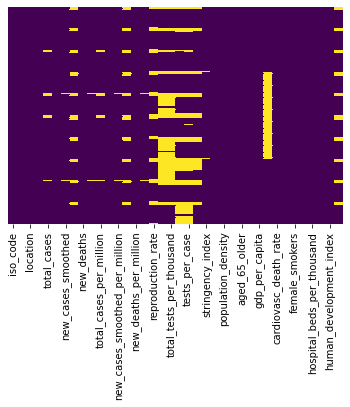

In [13]:
#heatmap to check for missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
#fill all mssing values with zero
df.fillna(0, inplace = True)

C:\Users\Sumayyah Musa\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 5072 to 57182
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         3171 non-null   object        
 1   continent                        3171 non-null   object        
 2   location                         3171 non-null   object        
 3   date                             3171 non-null   datetime64[ns]
 4   total_cases                      3171 non-null   float64       
 5   new_cases                        3171 non-null   float64       
 6   new_cases_smoothed               3171 non-null   float64       
 7   total_deaths                     3171 non-null   float64       
 8   new_deaths                       3171 non-null   float64       
 9   new_deaths_smoothed              3171 non-null   float64       
 10  total_cases_per_million          3171 non-null   float64

In [16]:
df.shape

(3171, 38)

In [17]:
df.describe()

total_cases      new_cases  new_cases_smoothed   total_deaths  \
count  3.171000e+03    3171.000000         3171.000000    3171.000000   
mean   4.775002e+05    5696.053295         5468.580046   17468.619048   
std    1.677137e+06   19658.869887        18499.781924   45408.226926   
min    0.000000e+00      -5.000000            0.000000       0.000000   
25%    1.842000e+03       9.000000           10.714000      22.000000   
50%    3.938700e+04     230.000000          243.286000     627.000000   
75%    1.152340e+05    1197.000000         1161.786000    9152.500000   
max    1.436746e+07  227885.000000       182663.000000  278932.000000   

        new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  3171.000000          3171.000000              3171.000000   
mean    122.171870           119.031148              5356.440072   
std     347.653628           325.020542              7869.406300   
min    -117.000000           -14.429000                 0.000000   
25%       0.000000             0.000000               325.160500   
50%       2.000000             2.571000              2784.260000   
75%      41.000000            40.286000              6989.247000   
max    2879.000000          2240.857000             50686.666000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count            3171.000000                     3171.000000   
mean               69.377036                       66.973059   
std               154.561429                      137.824907   
min                -0.902000                        0.000000   
25%                 1.244000                        1.543500   
50%                17.229000                       18.146000   
75%                68.392000                       66.049000   
max              2064.003000                     1536.030000   

       total_deaths_per_million  ...  gdp_per_capita  extreme_poverty  \
count               3171.000000  ...     3171.000000      3171.000000   
mean                 244.934419  ...    48498.421332         0.280290   
std                  293.085761  ...    13257.750602         0.357585   
min                    0.000000  ...    36085.843000         0.000000   
25%                    4.444000  ...    40585.721000         0.000000   
50%                  103.736000  ...    46682.515000         0.200000   
75%                  451.303000  ...    48472.545000         0.500000   
max                 1479.083000  ...    85535.383000         1.200000   

       cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
count            3171.000000          3171.000000     3171.000000   
mean              122.646972             6.806257       17.700442   
std                18.558288             2.359952        5.551452   
min                92.243000             4.280000        5.200000   
25%               109.361000             4.790000       14.800000   
50%               122.137000             6.410000       19.100000   
75%               133.982000             8.080000       20.000000   
max               153.507000            10.990000       25.100000   

       male_smokers  hospital_beds_per_thousand  life_expectancy  \
count   3171.000000                 3171.000000      3171.000000   
mean      23.040492                    2.977934        81.803072   
std        4.814475                    0.950300         1.221965   
min       16.600000                    2.220000        78.860000   
25%       18.800000                    2.500000        81.320000   
50%       24.600000                    2.610000        81.910000   
75%       27.300000                    3.280000        82.430000   
max       31.400000                    5.640000        83.620000   

       human_development_index  case_fatality_rate  
count              3171.000000         3171.000000  
mean                  0.925000            4.664265  
std                   0.005882            4.681772  
min                   0.916000            0.000000  
25

In [18]:
import plotly.express as px

fig1 = px.line(df, x="date", y="total_cases_per_million", color='location')
fig1.show()

In [19]:
fig2 = px.pie(df, values="total_deaths_per_million", names='location')
fig2.show()

In [20]:
#export the filtered data to csv for use in d3js
df.to_csv('covid-data.csv')